<a href="https://colab.research.google.com/github/anacarolinasm1609/anacarolinasm1609/blob/main/Exercicio_hidrofolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# bibliotecas importadas
import os
import numpy as np
import pandas as pd # manipulacao de tabelas
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor # ferramenta da rede neural
from sklearn.metrics import mean_squared_error # analise de resultados
from sklearn.metrics import r2_score # analise de resultados

In [50]:
# para gerar o grafico no browser
%matplotlib inline

In [51]:
!git clone https://github.com/anacarolinasm1609/anacarolinasm1609
%cd anacarolinasm1609

Cloning into 'anacarolinasm1609'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
/content/anacarolinasm1609/anacarolinasm1609/anacarolinasm1609


In [52]:
# leitura dos dados
df=pd.read_csv("Hydrofoil_ago_29_2018.csv")

In [53]:
df.head(5) # leitura das cinco primeiras linhas da tabela

,Unnamed: 0,Case,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
0,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,2,1,0.103733,2.549729,-0.689028,1.353022,0.950991
2,3,3,1,0.124480,3.628461,-0.835413,1.346323,1.624000
3,4,4,1,0.165973,6.374322,-1.864337,1.361538,3.803965
4,5,5,1,0.186719,8.217973,-2.301539,1.378858,5.517212


In [54]:
df.tail(5) # leitura das cinco ultimas linhas da tabela

,Unnamed: 0,Case,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
54,55,55,4,1.867195,234.378935,95.933163,3.230790,1573.524687
55,56,56,4,2.026944,270.663540,95.790939,2.932024,1972.589860
56,57,57,4,2.074661,274.586200,98.242317,2.955929,2048.288760
57,58,58,4,2.157647,291.257505,98.290939,2.932024,2259.555115
58,59,59,4,2.240634,286.354180,104.693695,2.979833,2306.958369


In [55]:
# filtragem das colunas de interesse
Index=[2,3,4,5,6,7] # colunas de interesse
Dat_Select=[]
Dat_Select=df.iloc[:,Index].copy()

In [56]:
Dat_Select.head(5)

,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.103733,2.549729,-0.689028,1.353022,0.950991
2,1,0.124480,3.628461,-0.835413,1.346323,1.624000
3,1,0.165973,6.374322,-1.864337,1.361538,3.803965
4,1,0.186719,8.217973,-2.301539,1.378858,5.517212


In [57]:
# normatizacao de dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b # normatizacao aplicada
        #x[i]=0.8*(x[i]-min_x)/(max_x-min_x)+0.1 # normatizacao do artigo
    return x

In [58]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [59]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select) # DAT calculado com base na funcao Normatiza

In [60]:
DAT.tail(5) # dado normatizado - ultimas 5 linhas da tabela

,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
54,1.0,0.555748,0.244792,0.842428,0.290669,-0.031709
55,1.0,0.688850,0.437500,0.839870,0.171315,0.213861
56,1.0,0.728608,0.458333,0.883962,0.180864,0.260444
57,1.0,0.797753,0.546875,0.884836,0.171315,0.390449
58,1.0,0.866897,0.520833,1.000000,0.190414,0.419620


In [61]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.9,random_state=None) # dados utilizados para o treino
test=DAT.drop(train.index) # o que resta das variaveis para o teste

In [62]:
train.head(5) # dados treino

,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
56,1.000000,0.728608,0.458333,0.883962,0.180864,0.260444
26,-0.333333,0.555748,0.442708,0.642230,0.409505,0.122245
23,-0.333333,0.037165,0.054688,0.192859,0.584856,-0.453057
24,-0.333333,0.210026,0.130208,0.432563,0.517801,-0.316209
3,-1.000000,-0.861711,-0.966146,-0.916618,-0.456079,-0.997659


In [63]:
test.head(5)

,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
9,-1.000000,-0.135696,-0.018750,-0.168314,0.796046,-0.575951
18,-0.333333,-0.827139,-0.940885,-0.912451,-0.443043,-0.994891
22,-0.333333,-0.135696,-0.057292,-0.090369,0.606437,-0.592607
25,-0.333333,0.382887,0.281250,0.515567,0.481548,-0.114088
28,-0.333333,0.728608,0.697917,0.680172,0.353671,0.467517


In [64]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1]]
x_test=test.iloc[:,[0,1]]
X_OLD=DAT_OLD.iloc[:,[0,1]]

In [65]:
# obtem a dependente potência (treino e teste)
Index=[5]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]

In [66]:
# define a rede neural 
model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,max_iter=100,
                     hidden_layer_sizes=(9, 8),random_state=1)

In [67]:
# treina a rede neural
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(9, 8), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [68]:
# usa a rede neural em calculos para treino e teste
y_calc_train=model.predict(x_train)
y_calc_test=model.predict(x_test)

In [69]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [70]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)

In [71]:
# recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [72]:
train

,Power
56,2048.288760
26,1823.708528
23,888.811015
24,1111.196652
3,3.803965
5,7.732290
11,1310.392734
37,826.045596
41,2086.942895
1,0.950991


In [73]:
# escolhe uma das resposta para fazer o grafico (resistencia-treino)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['Power'].copy()
resist_obs_train=train['Power'].copy()

In [74]:
# escolhe uma das resposta para fazer o grafico (resistencia-teste)
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['Power'].copy()
resist_obs_test=test['Power'].copy()

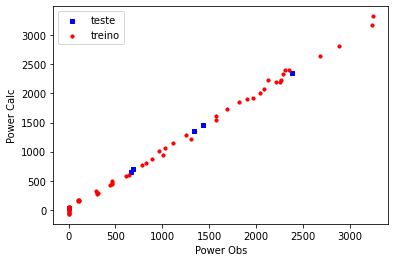

In [75]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Power Calc')
plt.xlabel('Power Obs')
plt.show()

In [76]:
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)

MSE teste= 727.3417740786253
R^2 teste= 0.9987059120114415


In [77]:
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

MSE treino= 2153.2041618831113
R^2 treino= 0.9977636666259615
